# **MODELADO PARA EL S&P500**

In [265]:
import pandas as pd
import numpy as np

In [266]:
# import yfinance as yf
# data = yf.Ticker('^GSPC')
# sp = data.history(period='max', auto_adjust=True, actions=False, rounding=True, interval='1d', prepost=False)
# sp.to_csv('sp500.csv', index=True, header=True, sep=',', mode='w')

In [267]:
sp = pd.read_csv('sp500.csv')

<Axes: title={'center': 'S&P 500'}, xlabel='Date', ylabel='Price'>

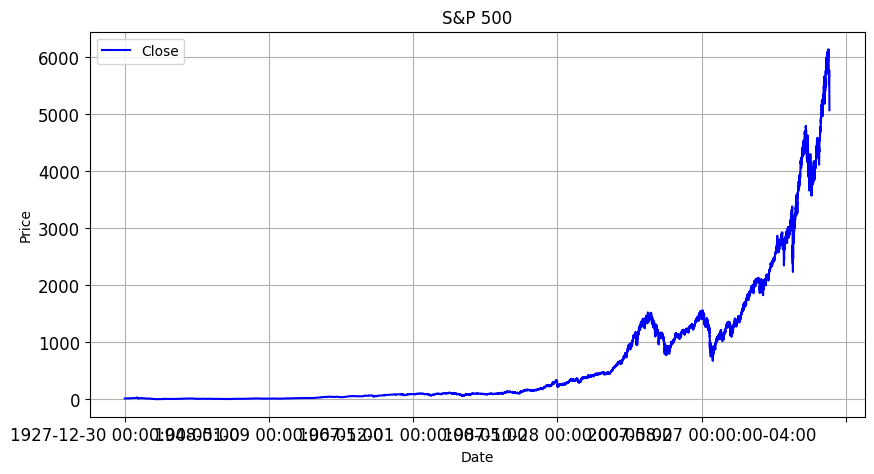

In [268]:
sp.plot(x='Date', y='Close', title='S&P 500', xlabel='Date', ylabel='Price', color='blue', grid=True, legend=True, figsize=(10, 5), fontsize=12)

# **TRANSFORMACIÓN**

La transformación que se usa es la de los log_retornos

In [269]:
# get the log returns
returns = np.log(sp['Close'] / sp['Close'].shift(1)) 

In [270]:
returns.dropna(inplace=True)

<Axes: title={'center': 'Log Returns of S&P 500'}>

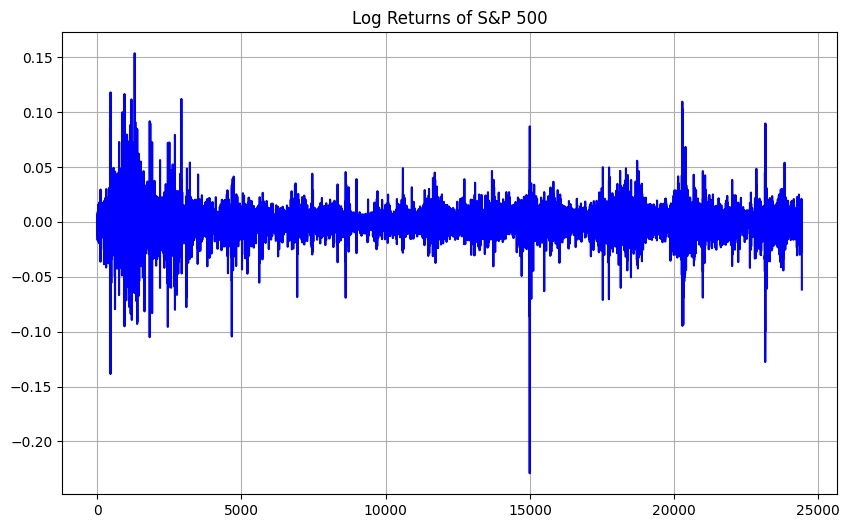

In [271]:
returns.plot(title='Log Returns of S&P 500', figsize=(10, 6), color='blue', grid=True)

# **ESTACIONARIEDAD**

In [272]:
from statsmodels.tsa.stattools import adfuller

In [273]:
adfuller(returns)

(-22.41340188847821,
 0.0,
 48,
 24381,
 {'1%': -3.4306182411968567,
  '5%': -2.861658554354915,
  '10%': -2.5668331030397713},
 -146703.13398884743)

## **AUTOCORRELACIONES**

In [274]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
import matplotlib.pyplot as plt

## **Autocorrelaciones Simples**

In [275]:
# get the autocorrelations
autocorr_values = acf(returns, nlags=24)

# drop the first value (lag 0)
autocorr_values = autocorr_values[1:]

print(autocorr_values)

[-0.01126004 -0.01670637  0.00103978  0.002732    0.00593184 -0.02688531
  0.01151863  0.00649455  0.02592484  0.0086882   0.00480341  0.01009341
 -0.02003524  0.00792737 -0.0083606   0.03178433 -0.01262232  0.00410101
  0.00743955  0.00705718 -0.00482838 -0.02185903 -0.01354469  0.00189953]


In [276]:
def significancia(N, d, rho_list):
    """Calculate the significance threshold from a list of rho values."""
    return 2 * np.sqrt(1 / (N - d) * (1 + 2 * sum(rho**2 for rho in rho_list)))

In [277]:
def FAC(N, d, r_list):
    """
    Check the significance of a list of autocorrelation values.
    For each value in r_list, update the corresponding rho value if its absolute
    value exceeds the significance threshold computed from the current rho list.

    If rho_list is not provided, it defaults to a list of zeros (same length as r_list).

    Returns the updated list of rho values.
    """
    significativos = []
    rho_list = [0] * len(r_list)
    
    updated_rhos = list(rho_list)  # Copy to retain original values when updating
    for i, r in enumerate(r_list):
        threshold_value = significancia(N, d, updated_rhos)
        if abs(r) > threshold_value:
            print(f"rho {i+1} es significativo")
            print(f"{abs(r)} > {threshold_value}\n")
            updated_rhos[i] = r
            significativos.append((r, i+1))
        else:
            print(f"rho {i+1} no es significativo")
            print(f"{abs(r)} < {threshold_value}\n")
    return updated_rhos, significativos

# Example usage
N = len(returns)
d = 0

ceros = len(autocorr_values)
rho_list = [0] * ceros

val_autocorr_sig, autocorr_sig = FAC(N, d, autocorr_values) # Valores de autocorrelacion significativos, Autocorrelaciones significativas

rho 1 no es significativo
0.011260040186004763 < 0.01279582412439751

rho 2 es significativo
0.016706370171614318 > 0.01279582412439751

rho 3 no es significativo
0.0010397805573300978 < 0.012799394976546197

rho 4 no es significativo
0.0027320023816794587 < 0.012799394976546197

rho 5 no es significativo
0.00593183866137896 < 0.012799394976546197

rho 6 es significativo
0.026885314413215657 > 0.012799394976546197

rho 7 no es significativo
0.01151863444149218 < 0.012808638137950778

rho 8 no es significativo
0.00649454899869739 < 0.012808638137950778

rho 9 es significativo
0.025924841953998218 > 0.012808638137950778

rho 10 no es significativo
0.008688195720570911 < 0.012817226695377729

rho 11 no es significativo
0.0048034144586916894 < 0.012817226695377729

rho 12 no es significativo
0.01009340517057748 < 0.012817226695377729

rho 13 es significativo
0.02003524199060879 > 0.012817226695377729

rho 14 no es significativo
0.007927366722876155 < 0.012822353476718151

rho 15 no es sign

In [278]:
val_autocorr_sig

[0,
 -0.016706370171614318,
 0,
 0,
 0,
 -0.026885314413215657,
 0,
 0,
 0.025924841953998218,
 0,
 0,
 0,
 -0.02003524199060879,
 0,
 0,
 0.0317843260431193,
 0,
 0,
 0,
 0,
 0,
 -0.021859030819418503,
 -0.013544692078872175,
 0]

In [279]:
# no me la creia
significancia(len(returns), 0, [0.016706370171614318, 0.026885314413215657])

0.012808638137950778

In [280]:
print("Valores de autocorrelacion significativos:")
for val, i in autocorr_sig:
    print(f"r{i}: {val}")

Valores de autocorrelacion significativos:
r2: -0.016706370171614318
r6: -0.026885314413215657
r9: 0.025924841953998218
r13: -0.02003524199060879
r16: 0.0317843260431193
r22: -0.021859030819418503
r23: -0.013544692078872175


## Autocorrelaciones Simples

In [281]:
pacf_values = pacf(returns, nlags=24)

# drop the first value (lag 0)
pacf_values = pacf_values[1:]

print(pacf_values)

[-0.0112605  -0.01683667  0.00065928  0.00247161  0.0060236  -0.0266807
  0.01112108  0.00584453  0.02650497  0.00957338  0.00615217  0.0096107
 -0.01928354  0.00767538 -0.00778659  0.03176186 -0.01255037  0.00475401
  0.00513924  0.00772939 -0.0057576  -0.01914473 -0.01574303  0.00124259]


In [282]:
def intervalo(N, d):
    "Esta es de las autocorrelaciones parciales"
    return 2*np.sqrt(1/ (N-d) )

In [283]:
def FACP(N, d, rho_list):
    """
    Check the significance of a list of autocorrelation values.
    For each value in rho_list, update the corresponding rho value if its absolute
    value exceeds the significance threshold computed from the current rho list.

    If rho_list is not provided, it defaults to a list of zeros (same length as r_list).

    Returns the updated list of rho values.
    """
    
    threshold_value = intervalo(N, d)
    significativos = []

    for i, r in enumerate(rho_list):
        
        if abs(r) > threshold_value:
            print(f"rho {i+1} es significativo")
            print(f"{abs(r)} > {threshold_value}\n")
            significativos.append((r, i+1))
        else:
            print(f"rho {i+1} no es significativo")
            print(f"{abs(r)} < {threshold_value}\n")
    
    return significativos

In [284]:
# Example usage
N = len(returns)
d = 0

ceros = len(pacf_values)
rho_list = [0] * ceros 

facp_sig = FACP(N, d, pacf_values)

rho 1 no es significativo
0.011260501115235858 < 0.01279582412439751

rho 2 es significativo
0.01683667173318154 > 0.01279582412439751

rho 3 no es significativo
0.0006592842480166088 < 0.01279582412439751

rho 4 no es significativo
0.0024716075878284216 < 0.01279582412439751

rho 5 no es significativo
0.006023600927032724 < 0.01279582412439751

rho 6 es significativo
0.02668070313916266 > 0.01279582412439751

rho 7 no es significativo
0.011121079852804978 < 0.01279582412439751

rho 8 no es significativo
0.005844531269377777 < 0.01279582412439751

rho 9 es significativo
0.02650497057664712 > 0.01279582412439751

rho 10 no es significativo
0.009573382510921994 < 0.01279582412439751

rho 11 no es significativo
0.0061521732378076064 < 0.01279582412439751

rho 12 no es significativo
0.009610699303996668 < 0.01279582412439751

rho 13 es significativo
0.01928353883074072 > 0.01279582412439751

rho 14 no es significativo
0.0076753829982796375 < 0.01279582412439751

rho 15 no es significativo


In [285]:
print(f"Valores de autocorrelacion parcial significativos:")
for r, i in facp_sig:
    print(f"rho {i}: {r}")

Valores de autocorrelacion parcial significativos:
rho 2: -0.01683667173318154
rho 6: -0.02668070313916266
rho 9: 0.02650497057664712
rho 13: -0.01928353883074072
rho 16: 0.03176185629655355
rho 22: -0.019144730438675598
rho 23: -0.01574302759175367


## plot

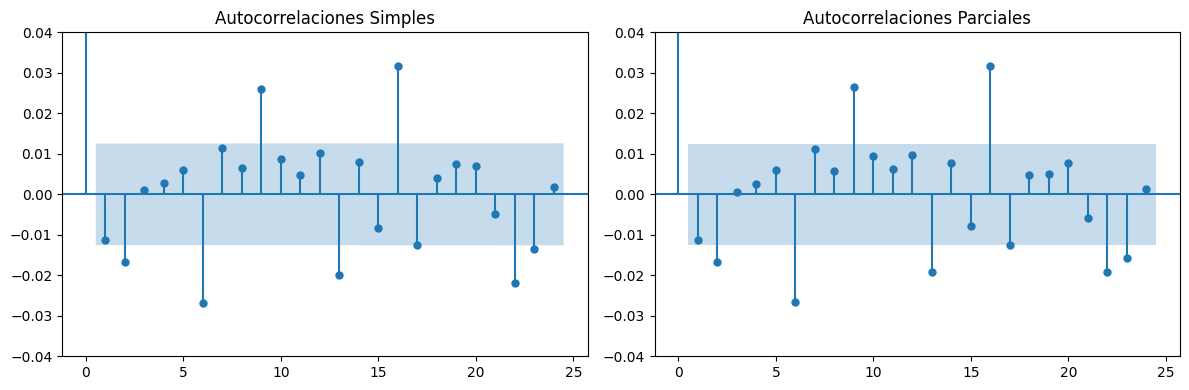

In [286]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(returns, lags=24, ax=axs[0])
axs[0].set_ylim(-0.04, 0.04)
axs[0].set_title('Autocorrelaciones Simples')

plot_pacf(returns, lags=24, ax=axs[1])
axs[1].set_ylim(-0.04, 0.04)
axs[1].set_title('Autocorrelaciones Parciales')

plt.tight_layout()
plt.show()


In [287]:
print("Valores de autocorrelacion significativos:")
for val, i in autocorr_sig:
    print(f"r{i}: {val}")

Valores de autocorrelacion significativos:
r2: -0.016706370171614318
r6: -0.026885314413215657
r9: 0.025924841953998218
r13: -0.02003524199060879
r16: 0.0317843260431193
r22: -0.021859030819418503
r23: -0.013544692078872175


In [288]:
print(f"Valores de autocorrelacion parcial significativos:")
for r, i in facp_sig:
    print(f"rho {i}: {r}")

Valores de autocorrelacion parcial significativos:
rho 2: -0.01683667173318154
rho 6: -0.02668070313916266
rho 9: 0.02650497057664712
rho 13: -0.01928353883074072
rho 16: 0.03176185629655355
rho 22: -0.019144730438675598
rho 23: -0.01574302759175367


## **MODELADO**

In [289]:
from statsmodels.tsa.arima.model import ARIMA

In [290]:
arima101 = ARIMA(returns, order=(1,0,1)).fit()
arima101.summary()

c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                24430
Model:                 ARIMA(1, 0, 1)   Log Likelihood               73471.997
Date:                Sun, 06 Apr 2025   AIC                        -146935.995
Time:                        03:11:10   BIC                        -146903.580
Sample:                             0   HQIC                       -146925.492
                              - 24430                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002   7.89e-05      2.926      0.003    7.62e-05       0.000
ar.L1          0.4235      0.176      2.406      0.016       0.078       0.768
ma.L1         -0.4349      0.175     -2.486      0.013      -0.778      -0.092
sigma2         0.0001   4.04e-07    353.553      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            358519.51
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [291]:
aic_value = arima101.aic
print(f'The AIC of the ARIMA(1,0,1) model is: {aic_value}')

The AIC of the ARIMA(1,0,1) model is: -146935.9947019462


In [292]:
AICs = []
for i in range(0, 2):
    for j in range(0, 2):
        arima = ARIMA(returns, order=(i,0,j)).fit()
        AICs.append(("ARIMA("+str(i)+",0,"+str(j)+")", arima.aic))

c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib

In [293]:
AICs = sorted(AICs, key=lambda x: x[1])

In [294]:
AICs

[('ARIMA(1,0,1)', -146935.9947019462),
 ('ARIMA(0,0,1)', -146934.91265597273),
 ('ARIMA(1,0,0)', -146934.80602329873),
 ('ARIMA(0,0,0)', -146933.6922793492)]

### una libreria que busca el mejor ARIMA

In [316]:
import pmdarima as pm


auto_arima_model = pm.auto_arima(returns, seasonal=False, stepwise=True, suppress_warnings=True, trace=True)
auto_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-146931.524, Time=0.82 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-146926.536, Time=0.41 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-146927.430, Time=0.46 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-146927.527, Time=0.30 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-146929.989, Time=3.34 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-146930.070, Time=0.61 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-146916.535, Time=2.48 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-146924.155, Time=2.29 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-146928.288, Time=0.39 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-146928.830, Time=0.84 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-146918.535, Time=1.82 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-146924.060, Time=2.00 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-146938.859, Time=6.27 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-146937.675, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                24430
Model:               SARIMAX(2, 0, 2)   Log Likelihood               73475.429
Date:                Sun, 06 Apr 2025   AIC                        -146938.859
Time:                        03:23:06   BIC                        -146890.237
Sample:                             0   HQIC                       -146923.104
                              - 24430                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003   9.76e-05      2.743      0.006    7.64e-05       0.000
ar.L1          0.2653      0.149      1.780      0.075      -0.027       0.557
ar.L2         -0.4254      0.123     -3.452      0.001      -0.667      -0.184
ma.L1         -0.2783      0.150     -1.858      0.063      -0.572       0.015
ma.L2          0.4117      0.125      3.293      0.001       0.167       0.657
sigma2         0.0001   4.05e-07    353.067      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):            358426.29
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# **VERIFICACION DE SUPUESTOS**

## **Principio de Parsimonia**

In [295]:
arima109 = ARIMA(returns, order=(1,0,9)).fit()

c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [296]:
arima109.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                24430
Model:                 ARIMA(1, 0, 9)   Log Likelihood               73490.012
Date:                Sun, 06 Apr 2025   AIC                        -146956.024
Time:                        03:11:20   BIC                        -146858.781
Sample:                             0   HQIC                       -146924.515
                              - 24430                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002    8.1e-05      2.846      0.004    7.18e-05       0.000
ar.L1         -0.2943      0.117     -2.521      0.012      -0.523      -0.066
ma.L1          0.2838      0.117      2.430      0.015       0.055       0.513
ma.L2         -0.0208      0.003     -6.813      0.000      -0.027      -0.015
ma.L3         -0.0028      0.004     -0.790      0.430      -0.010       0.004
ma.L4          0.0027      0.003      0.825      0.409      -0.004       0.009
ma.L5          0.0064      0.003      2.120      0.034       0.000       0.012
ma.L6         -0.0243      0.003     -7.063      0.000      -0.031      -0.018
ma.L7          0.0032      0.004      0.724      0.469      -0.005       0.012
ma.L8          0.0105      0.004      2.975      0.003       0.004       0.017
ma.L9          0.0274      0.003      8.325      0.000       0.021       0.034
sigma2         0.0001   4.12e-07    346.874      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):            356167.12
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Ljung-Box(Q = 0.03, p = 0.85), no hay autocorrelacion en los residuos  
Jarque-Bera(JB = 0.00), los residuos no son normales  
Heterocedasticidad = 0, Residuos tienen varianza constante  

## ¿Qué pasa si el 3 coeficiente es igual a cero?

In [317]:
# Crear una copia de los coeficientes
params = arima109.params.copy()

# Modificar el coeficiente ma.L3 a cero
params['ma.L3'] = 0

# Ahora puedes crear un nuevo modelo utilizando estos coeficientes
# Pero es necesario reiniciar el modelo con los nuevos parámetros


In [318]:
params

const     0.000230
ar.L1    -0.294302
ma.L1     0.283827
ma.L2    -0.020809
ma.L3     0.000000
ma.L4     0.002734
ma.L5     0.006434
ma.L6    -0.024270
ma.L7     0.003218
ma.L8     0.010476
ma.L9     0.027398
sigma2    0.000143
dtype: float64

In [ ]:
# Ajustar el modelo con los parámetros modificados
model_modified = ARIMA(returns, order=(1, 0, 9)).fit(start_params=params)

c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [320]:
model_modified.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                24430
Model:                 ARIMA(1, 0, 9)   Log Likelihood               73489.728
Date:                Sun, 06 Apr 2025   AIC                        -146955.456
Time:                        03:32:04   BIC                        -146858.214
Sample:                             0   HQIC                       -146923.947
                              - 24430                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002   8.11e-05      2.840      0.005    7.14e-05       0.000
ar.L1         -0.2943      0.117     -2.522      0.012      -0.523      -0.066
ma.L1          0.2838      0.117      2.431      0.015       0.055       0.513
ma.L2         -0.0208      0.003     -6.816      0.000      -0.027      -0.015
ma.L3      -2.358e-15      0.004  -6.57e-13      1.000      -0.007       0.007
ma.L4          0.0027      0.003      0.808      0.419      -0.004       0.009
ma.L5          0.0064      0.003      2.131      0.033       0.001       0.012
ma.L6         -0.0243      0.003     -7.050      0.000      -0.031      -0.018
ma.L7          0.0032      0.004      0.722      0.471      -0.006       0.012
ma.L8          0.0105      0.004      2.973      0.003       0.004       0.017
ma.L9          0.0274      0.003      8.325      0.000       0.021       0.034
sigma2         0.0001   4.12e-07    346.920      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):            355512.71
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

tenemos un modelo peorcito

In [313]:
# Ajustamos un nuevo modelo ARIMA con order (1, 0, 8) para eliminar el ma.L3
arima108 = ARIMA(returns, order=(1, 0, 8)).fit()


c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [314]:
arima108.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                24430
Model:                 ARIMA(1, 0, 8)   Log Likelihood               73484.134
Date:                Sun, 06 Apr 2025   AIC                        -146946.268
Time:                        03:17:45   BIC                        -146857.129
Sample:                             0   HQIC                       -146917.385
                              - 24430                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002   7.94e-05      2.902      0.004    7.48e-05       0.000
ar.L1         -0.2256      0.413     -0.547      0.585      -1.034       0.583
ma.L1          0.2151      0.412      0.522      0.602      -0.593       1.023
ma.L2         -0.0202      0.005     -4.085      0.000      -0.030      -0.011
ma.L3         -0.0017      0.008     -0.215      0.829      -0.017       0.014
ma.L4          0.0025      0.003      0.757      0.449      -0.004       0.009
ma.L5          0.0065      0.003      2.131      0.033       0.001       0.012
ma.L6         -0.0245      0.004     -6.047      0.000      -0.032      -0.017
ma.L7          0.0050      0.011      0.449      0.653      -0.017       0.027
ma.L8          0.0097      0.005      1.983      0.047       0.000       0.019
sigma2         0.0001   4.11e-07    347.153      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):            359487.51
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **Analisis de Residuos**

In [297]:
residuos = arima109.resid.dropna()

### **Media Cero**

In [298]:
from scipy.stats import t as t_dist

In [299]:
from scipy.stats import ttest_1samp

# H0: The mean of the residuals is equal to 0
# H1: The mean of the residuals is not equal to 0
ttest_1samp(residuos, 0)

TtestResult(statistic=0.016559121506383886, pvalue=0.9867884716240358, df=24429)

El p-valor es muy grande, entonces la media de los residuos podria ser cero :)

In [300]:
from scipy.stats import wilcoxon

# H0: The median of the residuals is equal to 0
# H1: The median of the residuals is not equal to 0
wilcoxon(residuos)

WilcoxonResult(statistic=144820132.0, pvalue=6.762127075930931e-05)

El p-valor es muy pequeño, entonces la mediana podría ser diferente de cero :(

In [301]:
from statsmodels.stats.descriptivestats import sign_test

# H0: The median of the residuals is equal to 0
# H1: The median of the residuals is not equal to 0
sign_test(residuos)

(425.0, 5.561491580646932e-08)

### **Distribucion Normal**

In [302]:
from scipy.stats import jarque_bera

jarque_bera(residuos)

SignificanceResult(statistic=356166.8442278611, pvalue=0.0)

Estadístico de Jarque Bera, p-valor, sesgo, kurtosis.

Los residuos no son normales, tienen un sesgo negativo, la kurtosis es muy alta, se espera que sea 3, sugiere que los residuos tienen colas muy gruesas o hay muchos outliers

In [303]:
from statsmodels.stats.diagnostic import lilliefors
# Estadistico, p-valor
lilliefors(residuos)

(0.09739134988068032, 0.0009999999999998899)

In [304]:
from scipy.stats import kstest
# Estadistico, p-valor
kstest(residuos, 'norm')

KstestResult(statistic=0.47835200408367273, pvalue=0.0, statistic_location=0.03477562902544919, statistic_sign=1)

In [305]:
from scipy.stats import normaltest

normaltest(residuos)

NormaltestResult(statistic=6712.437462125869, pvalue=0.0)

In [306]:
from scipy.stats import anderson

anderson(residuos)

AndersonResult(statistic=592.7394435289825, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1.2659254022142346e-06, scale=0.011949027349192001)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

### **Varianza Constante**

In [238]:
from statsmodels.tools.tools import add_constant
add_constant(returns)

,const,Close
1,1.0,0.005647
2,1.0,-0.002255
3,1.0,-0.009640
4,1.0,0.006248
5,1.0,-0.009101
...,...,...
24426,1.0,0.005523
24427,1.0,0.003774
24428,1.0,0.006706
24429,1.0,-0.049606


In [307]:
from statsmodels.stats.diagnostic import het_breuschpagan
# H0: Homocedasticidad (varianza constante)
# H1: Heterocedasticidad (varianza no constante)

# Add a constant to the exogenous variables
exog = add_constant(returns)

# Perform the test
stat, p_value, _, _ = het_breuschpagan(residuos, exog)
print(f'Statistic: {stat}, p-value: {p_value}') # p-value > 0.05, homocedasticidad (variancia constante)

Statistic: 295.1704213802668, p-value: 3.715369009463656e-66


### **Independencia**

In [312]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(residuos, lags=10)

,lb_stat,lb_pvalue
1,0.034522,0.852602
2,0.055283,0.972737
3,0.088842,0.993142
4,0.110325,0.998533
5,0.114579,0.999773
6,0.114734,0.999970
7,0.118451,0.999996
8,0.120753,0.999999
9,0.123433,1.000000
10,7.427250,0.684587


como todos los p-valores son mayores a 0.05, no hay evidencia de correlacion significativa entre los lags

### **Modelo admisible**

es Estacionario e einvertible

# **PREDICCIÓN DEL SIGUIENTE DÍA**